In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
N = 10 ** 4

Придумаем распределение с плотностью $p = 5 \frac{1}{x^6} I_{x \in [1, \infty]}$ (множитель 5 возникает из нормировки). Его первые четыре момента конечны, а пятый нет (так как интеграл $\int_1^\inf \frac{1}{x}$ расходится). Сгенерируем выборку размера $N = 10^4$ для этого распределения.

In [3]:
class my_distribution(sts.rv_continuous):
       def _pdf(self, x):
        return 1 / (x ** 6) * 5
distribution = my_distribution(a=1, name='my_distribution')
my_distr_sample = distribution.rvs(size=N)

Построим график плотности данного распределения, а также нанесем на график точки выборки с нулевой y-координатой:

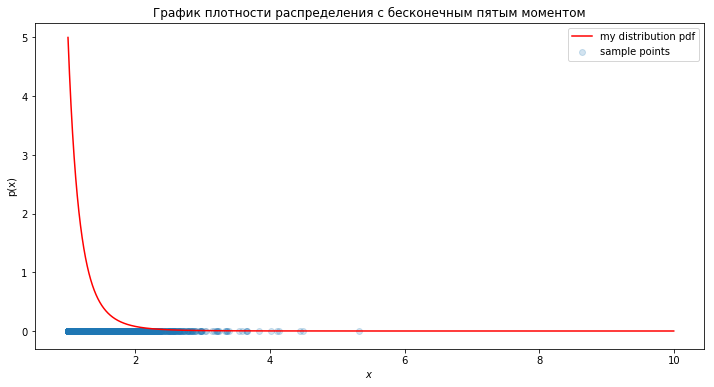

In [4]:
x = np.linspace(1, 10, 10 ** 5)
plt.figure(figsize=(12, 6))
plt.plot(x, distribution.pdf(x), 'r', label='my distribution pdf')

plt.xlabel("$x$")
plt.ylabel("p(x)")
plt.title("График плотности распределения с бесконечным пятым моментом")
plt.scatter(my_distr_sample, np.zeros(N), alpha=0.2, label="sample points")
plt.legend(loc="best");

Для всех $n \leqslant N$ посчитаем оценку $s^2 = \overline{X^2} - \left(\overline{X}\right)^2$ для дисперсии и построи график зависимости модуля разности оценки дисперсии и ее истинного значения $D_{real}X_1 = EX_1^2 - (EX_1)^2 = \frac{5}{48}$ от размера выборки:

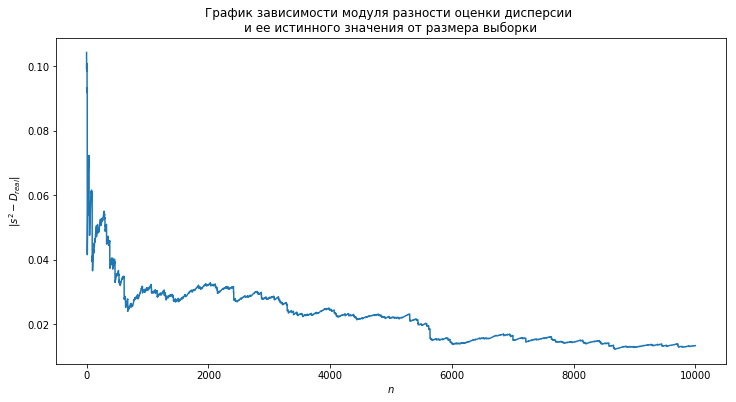

In [5]:
s = np.zeros(N)
for n in range(N):
    s[n] = np.mean(my_distr_sample[:n + 1] ** 2) - \
    np.mean(my_distr_sample[:n + 1]) ** 2

plt.figure(figsize=(12, 6))
plt.xlabel(r"$n$")
plt.ylabel(r"$|s^2 - D_{real}|$")
plt.title("""График зависимости модуля разности оценки дисперсии 
и ее истинного значения от размера выборки""")
plt.plot(range(N), abs(s - 5 / 48));

Как можно заметить по графику, оценка дисперсии стремится к истинному значению при увеличении размера выборки, что соответствует теоретическим результатам полученным на семинаре о том, что выборочная дисперсия является состоятельной оценкой дисперсии. Тем не менне, данная оценка также является смещенной, что на графике соответсвует тому, что существует небольшое различие между оценкой и истинной дисперсией при большом размере выборки.

Проведем аналогичное исследование для выборки из рапределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) строим график оценки дисперсии:

In [183]:
cauchy_rv = sts.cauchy()
sample = cauchy_rv.rvs(N)

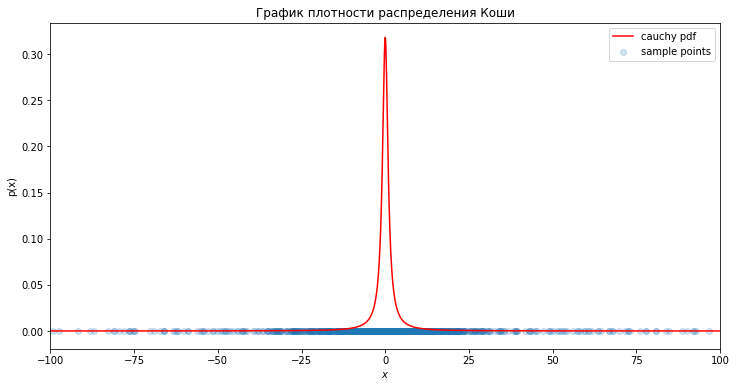

In [184]:
x = np.linspace(min(sample), max(sample), 10 ** 5)
plt.figure(figsize=(12, 6))
plt.plot(x, sts.cauchy.pdf(x), 'r', label='cauchy pdf')
plt.xlim(-100, 100)
plt.xlabel("$x$")
plt.ylabel("p(x)")
plt.title("График плотности распределения Коши")
plt.scatter(sample, np.zeros(len(sample)), alpha=0.2, label="sample points")
plt.legend(loc="best");

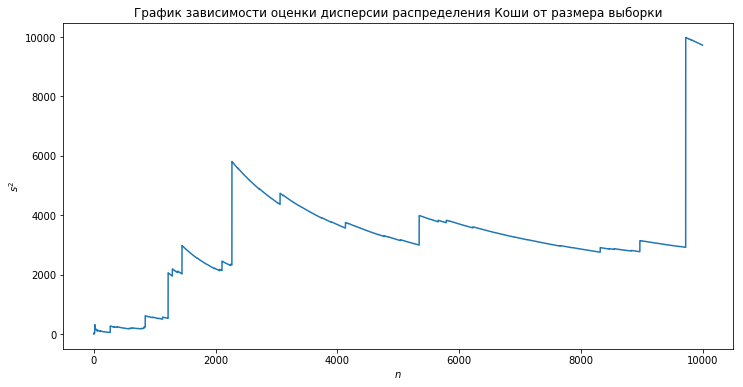

In [185]:
s = np.zeros(N)
for n in range(N):
    s[n] = np.mean(sample[:n + 1] ** 2) - np.mean(sample[:n + 1]) ** 2
plt.figure(figsize=(12, 6))
plt.xlabel(r"$n$")
plt.ylabel(r"$s^2$")
plt.title("""График зависимости оценки дисперсии распределения Коши 
          от размера выборки""")
plt.plot(range(N), s);

Из графика видно, что оценочная дисперсия распределения Коши принимает очень большие значения и не сходится к какой-то конкретной величине.

$\textbf{Вывод:}$ Как видно из графиков, для распределения с существующими первыми четырьма моментами (а соответственно и с существующей дисперсией) оценка дисперсии приближается к истинной при увеличении размера выборки, в то время, как оценка дисперсии распределения Коши не стремится к какой-либо величине, так как данное распределение не имеет дисперсии.